In [ ]:
pip install mysql-connector-python

In [ ]:
pip install scipy 

In [ ]:
pip install sqlalchemy

In [2]:
from sqlalchemy import create_engine
import mysql.connector
import pandas as pd

# 서버 연결 정보 설정
host = 'localhost'
user = 'root'
password = 'password'
database = 'hr_hipo'

# # MySQL 서버에 연결 (import mysql.connector)
# connection = mysql.connector.connect(
#     host=host,
#     user=user,
#     password=password,
#     database=database
#     )
# cursor = connection.cursor()
query = "SELECT * FROM hr_hipo" 
# df1 = pd.read_sql(query, connection)

# MySQL 서버에 연결 (sqlalchemy)
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')
df2 = pd.read_sql(query, engine)
print(df2.head(3))



   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8          

EDA 1 TotalWorkingYears
근속년수와 퍼포먼스간 특징 분포 확인

In [ ]:
-- TotalWorkingYears data description 
select 
	PerformanceRating, 	   
	avg(TotalWorkingYears),
    count(TotalWorkingYears),
    min(TotalWorkingYears),
    max(TotalWorkingYears),
    std(TotalWorkingYears)
   
from hr_hipo.hr_hipo 
group by PerformanceRating

In [4]:
# EDA 1)TotalWorkingYears  
query_workyear1 = "select avg(TotalWorkingYears),count(TotalWorkingYears),min(TotalWorkingYears),max(TotalWorkingYears),std(TotalWorkingYears),PerformanceRating from hr_hipo.hr_hipo group by PerformanceRating"  
df1 = pd.read_sql(query_workyear1, engine)
print(df1.head)


<bound method NDFrame.head of    avg(TotalWorkingYears)  count(TotalWorkingYears)  min(TotalWorkingYears)  \
0                 11.2572                      1244                       0   
1                 11.4027                       226                       1   

   max(TotalWorkingYears)  std(TotalWorkingYears)  PerformanceRating  
0                      40                7.777021                  3  
1                      37                7.783110                  4  >


<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

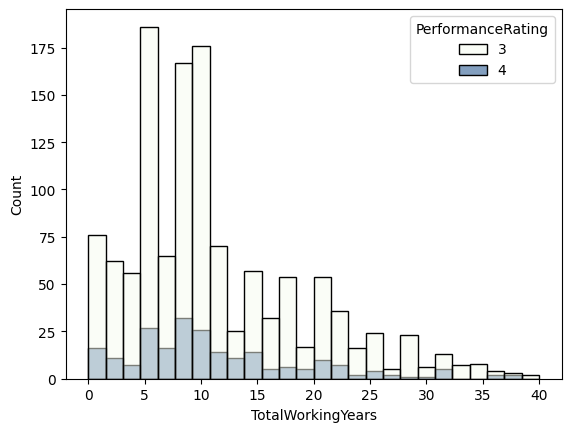

In [44]:
# EDA 1)TotalWorkingYears  
import matplotlib.pyplot as plt
import seaborn as sns
query = "SELECT * FROM hr_hipo" 
df = pd.read_sql(query, engine)
# df[['TotalWorkingYears','PerformanceRating']]

sns.histplot(data=df,x='TotalWorkingYears', hue='PerformanceRating', palette='GnBu')

# hist_per_year = sns.FacetGrid(df, col='PerformanceRating', height=4, aspect=1.5)
# hist_per_year.map_dataframe(sns.histplot, x='TotalWorkingYears', bins=20)
# hist_per_year.set_axis_labels('TotalWorkingYears', 'Frequency')
# hist_per_year.set_titles('PerformanceRating {col_name}')
# hist_per_year.tight_layout()
# plt.show()



<Axes: xlabel='PerformanceRating', ylabel='TotalWorkingYears'>

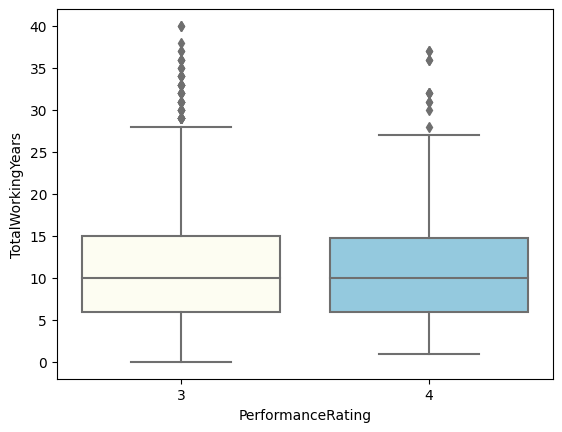

In [45]:
# EDA 1)TotalWorkingYears 

df = pd.read_sql(query, engine)
sns.boxplot(data=df, x='PerformanceRating',y='TotalWorkingYears',palette={4:"skyblue",3:"ivory"})

In [19]:
# EDA 1)TotalWorkingYears 
df3=df[df['PerformanceRating'] == 3]['TotalWorkingYears'].describe()
df4=df[df['PerformanceRating'] == 4]['TotalWorkingYears'].describe()

combined_df = pd.concat([df3, df4], axis=1)
combined_df.columns = ['Perfor_3', 'Perfor_4']

print(combined_df)

# No significant difference 

          Perfor_3    Perfor_4
count  1244.000000  226.000000
mean     11.257235   11.402655
std       7.780149    7.800387
min       0.000000    1.000000
25%       6.000000    6.000000
50%      10.000000   10.000000
75%      15.000000   14.750000
max      40.000000   37.000000


In [80]:
# EDA 1)TotalWorkingYears 
from scipy.stats import ttest_ind
from scipy.stats import levene

df3=df[df['PerformanceRating'] == 3]['TotalWorkingYears']
df4=df[df['PerformanceRating'] == 4]['TotalWorkingYears']

print(levene(df3,df4))
print(stats.ttest_ind(df3,df4))

# LeveneResult(statistic=0.002356473798030655, pvalue=0.9612896808160774)
# => 두 집단의 등분산이 가정된다.

# TtestResult(statistic=-0.2583860592624208, pvalue=0.7961451950286312, df=1468.0)
# => 두 집단은 통계적으로 유의한 차이를 보이지 않는다. 


LeveneResult(statistic=0.002356473798030655, pvalue=0.9612896808160774)
TtestResult(statistic=-0.2583860592624208, pvalue=0.7961451950286312, df=1468.0)


EDA 2 WorkLiffeBalance
업무 성과가 낮은 사람의 일과 생활의 균형 정도를 추출하여 특징을 그래프로 표현

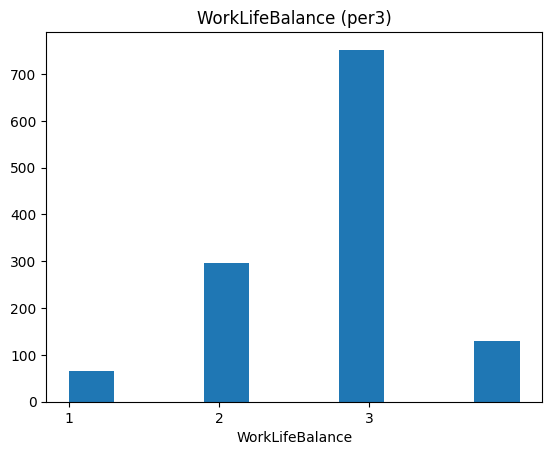

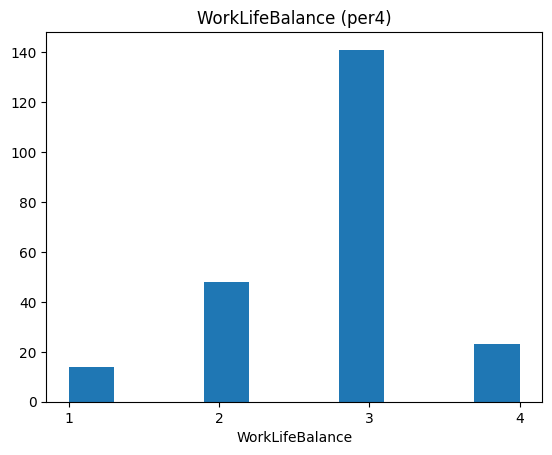

In [81]:
# EDA 2) WorkLifeBalance  
import matplotlib.pyplot as plt
import seaborn as sns
query = "SELECT * FROM hr_hipo" 
df = pd.read_sql(query, engine)

# sns.histplot(data=df,x='WorkLifeBalance', hue='PerformanceRating', palette='GnBu')

# 'PerformanceRating' == 3
plt.hist(df[df['PerformanceRating'] == 3]['WorkLifeBalance'])
plt.xlabel('WorkLifeBalance')
plt.xticks(range(1,4))
plt.title("WorkLifeBalance (per3)")
plt.show()

# 'PerformanceRating' == 4
plt.hist(df[df['PerformanceRating'] == 4]['WorkLifeBalance'])
plt.xlabel('WorkLifeBalance')
plt.xticks(range(int(df['WorkLifeBalance'].min()), int(df['WorkLifeBalance'].max()) + 1))
plt.title("WorkLifeBalance (per4)")
plt.show()

In [122]:
from scipy.stats import chi2_contingency
query = "SELECT * FROM hr_hipo" 
df = pd.read_sql(query, engine)

df3=df[df['PerformanceRating'] == 3]['WorkLifeBalance'].value_counts().reset_index()
df4=df[df['PerformanceRating'] == 4]['WorkLifeBalance'].value_counts().reset_index()
combined_df = pd.concat([df3, df4], axis=1)

combined_df=combined_df.iloc[:,[0,1,3]]
combined_df.columns=["WorkLifeBalance","per3","per4"]
combined_df=combined_df.T

combined_df
combined_df.columns = combined_df.iloc[0]
combined_df = combined_df.iloc[1:]

combined_df

chi2_contingency(combined_df)
# Chi2ContingencyResult(statistic=0.943625347591136, pvalue=0.8148892551840032, dof=3, expected_freq=array([[755.70884354, 291.11292517, 129.47755102,  67.70068027], [137.29115646,  52.88707483,  23.52244898,  12.29931973]]))
# 통계적으로 동일하다 

Chi2ContingencyResult(statistic=0.943625347591136, pvalue=0.8148892551840032, dof=3, expected_freq=array([[755.70884354, 291.11292517, 129.47755102,  67.70068027],
       [137.29115646,  52.88707483,  23.52244898,  12.29931973]]))

EDA 3 YearsSinceLastPromotion

In [ ]:
-- YearsSinceLastPromotion data description  
select 
    avg(YearsSinceLastPromotion),
    count(YearsSinceLastPromotion),
    min(YearsSinceLastPromotion)
    ,max(YearsSinceLastPromotion),
    std(YearsSinceLastPromotion),
    PerformanceRating 
from hr_hipo.hr_hipo 
group by PerformanceRating

In [128]:
query = "SELECT * FROM hr_hipo" 
df = pd.read_sql(query, engine)

query_workyear1 = "select avg(YearsSinceLastPromotion),count(YearsSinceLastPromotion),min(YearsSinceLastPromotion),max(YearsSinceLastPromotion),std(YearsSinceLastPromotion),PerformanceRating from hr_hipo.hr_hipo group by PerformanceRating"  
df1 = pd.read_sql(query_workyear1, engine)

df[['YearsSinceLastPromotion','PerformanceRating']]
print(df1)

   avg(YearsSinceLastPromotion)  count(YearsSinceLastPromotion)  \
0                        2.1632                            1244   
1                        2.3230                             226   

   min(YearsSinceLastPromotion)  max(YearsSinceLastPromotion)  \
0                             0                            15   
1                             0                            15   

   std(YearsSinceLastPromotion)  PerformanceRating  
0                      3.177477                  3  
1                      3.449651                  4  


<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

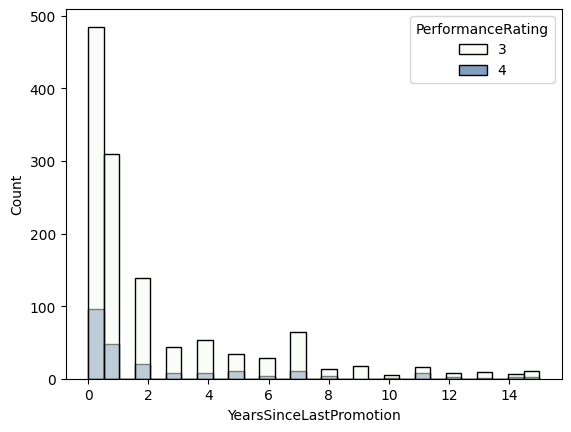

In [135]:
sns.histplot(data=df,x='YearsSinceLastPromotion', hue='PerformanceRating', palette='GnBu')


<Axes: xlabel='PerformanceRating', ylabel='YearsSinceLastPromotion'>

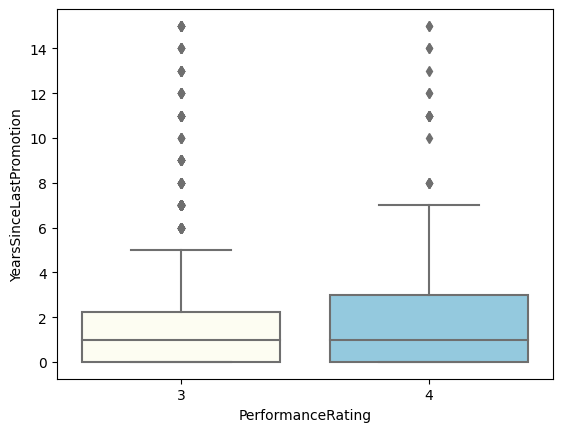

In [136]:
sns.boxplot(data=df, x='PerformanceRating',y='YearsSinceLastPromotion',palette={4:"skyblue",3:"ivory"})

EDA 4 OverTime

In [ ]:
-- OverTime data description  
select 
    PerformanceRating,
    SUM(CASE WHEN OverTime  = 'Yes' THEN 1 ELSE 0 END) AS YesCount,
    SUM(CASE WHEN OverTime  = 'No' THEN 1 ELSE 0 END) AS YesCount,
    count(*) as TotalCount,
    SUM(CASE WHEN OverTime  = 'Yes' THEN 1 ELSE 0 END)/count(*) as YesRatio,
    SUM(CASE WHEN OverTime  = 'No' THEN 1 ELSE 0 END)/count(*) as NoRatio
from hr_hipo.hr_hipo
group by PerformanceRating

In [157]:
query = "SELECT * FROM hr_hipo"  
df = pd.read_sql(query, engine)

# 'OverTime' 컬럼을 기준으로 'Yes' 및 'No' 값의 개수와 총 개수 계산
result_df = df.groupby('PerformanceRating')['OverTime'].value_counts().unstack(fill_value=0)

# 'Yes' 및 'No' 비율 계산
result_df['YesRatio'] = result_df['Yes'] / (result_df['Yes'] + result_df['No'])
result_df['NoRatio'] = result_df['No'] / (result_df['Yes'] + result_df['No'])
result_df.reset_index(inplace=True)

result_df

OverTime,PerformanceRating,No,Yes,YesRatio,NoRatio
0,3,893,351,0.282154,0.717846
1,4,161,65,0.287611,0.712389


EDA 5 StockOptionLevel

In [ ]:
-- StockOptionLevel data description
select 
    PerformanceRating,
    SUM(CASE WHEN StockOptionLevel = 3 THEN 1 ELSE 0 END) AS stock3,
    SUM(CASE WHEN StockOptionLevel = 2 THEN 1 ELSE 0 END) AS stock2,
    SUM(CASE WHEN StockOptionLevel = 1 THEN 1 ELSE 0 END) AS stock1,
    SUM(CASE WHEN StockOptionLevel = 0 THEN 1 ELSE 0 END) AS stock0,
    count(*) as TotalCount,
    SUM(CASE WHEN StockOptionLevel = 3 THEN 1 ELSE 0 END)/count(*) as stock3_ratio,
    SUM(CASE WHEN StockOptionLevel = 2 THEN 1 ELSE 0 END)/count(*) as stock2_ratio,
    SUM(CASE WHEN StockOptionLevel = 1 THEN 1 ELSE 0 END)/count(*) as stock1_ratio,
    SUM(CASE WHEN StockOptionLevel = 0 THEN 1 ELSE 0 END)/count(*) as stock0_ratio
    
    from hr_hipo.hr_hipo
group by PerformanceRating

In [187]:
query = "SELECT * FROM hr_hipo"  
df = pd.read_sql(query, engine)

# 'StockOptionLevel' 컬럼을 기준으로 스톡레벨 값의 개수와 총 개수 계산
result_df = df.groupby('PerformanceRating')['StockOptionLevel'].value_counts().unstack(fill_value=0)

# 'Yes' 및 'No' 비율 계산
result_df['stock3_ratio'] = result_df[3] / (result_df[3] + result_df[2]+ result_df[1]+ result_df[0])
result_df['stock2_ratio'] = result_df[2] / (result_df[3] + result_df[2]+ result_df[1]+ result_df[0])
result_df['stock1_ratio'] = result_df[1] / (result_df[3] + result_df[2]+ result_df[1]+ result_df[0])
result_df['stock0_ratio'] = result_df[0] / (result_df[3] + result_df[2]+ result_df[1]+ result_df[0])
result_df.reset_index(inplace=True)

df3=result_df[['PerformanceRating','stock3_ratio','stock2_ratio','stock1_ratio','stock0_ratio']]
df3

 
# pie3

# -- import matplotlib.pyplot as plt
# -- plt.pie(result_df[['PerformanceRating','stock3_ratio','stock2_ratio','stock1_ratio','stock0_ratio']])


StockOptionLevel,PerformanceRating,stock3_ratio,stock2_ratio,stock1_ratio,stock0_ratio
0,3,0.058682,0.109325,0.397910,0.434084
1,4,0.053097,0.097345,0.446903,0.402655


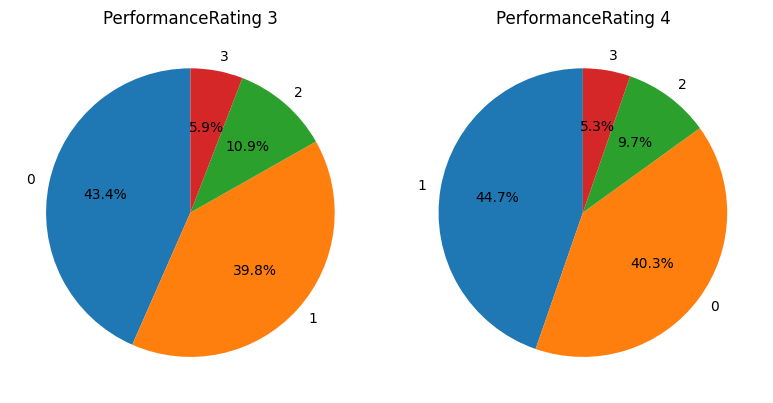

: 

In [191]:
query = "SELECT * FROM hr_hipo"  
df = pd.read_sql(query, engine)
df[['PerformanceRating','StockOptionLevel']]

# PerformanceRating와 StockOptionLevel 조합별 개수 계산
combination_counts = df.groupby(['PerformanceRating', 'StockOptionLevel']).size().reset_index(name='Count')

pr3_data = df[df['PerformanceRating'] == 3]
pr4_data = df[df['PerformanceRating'] == 4]

# PR3 파이차트 그리기
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
pr3_counts = pr3_data['StockOptionLevel'].value_counts()
plt.pie(pr3_counts, labels=pr3_counts.index.map(str), autopct='%1.1f%%', startangle=90)
plt.title('PerformanceRating 3')

# PR4 파이차트 그리기
plt.subplot(1, 2, 2)
pr4_counts = pr4_data['StockOptionLevel'].value_counts()
plt.pie(pr4_counts, labels=pr4_counts.index.map(str), autopct='%1.1f%%', startangle=90)
plt.title('PerformanceRating 4')

plt.tight_layout()
plt.show()

EDA 6 Main Attributes 

In [6]:
query = "SELECT * FROM hr_hipo"  
df = pd.read_sql(query, engine)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

query = "SELECT * FROM hr_hipo"  
df = pd.read_sql(query, engine)
# df.columns

df = df.drop(columns=['PercentSalaryHike'])
Y_train = df.pop('PerformanceRating')
X_train=pd.get_dummies(df)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [27]:
# 랜덤 포레스트 분류
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
feature_importances = clf.feature_importances_

# 중요도를 데이터프레임으로 변환하여 컬럼 이름과 함께 출력
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head)


<bound method NDFrame.head of                               Feature  Importance
5                      EmployeeNumber    0.070530
12                        MonthlyRate    0.062863
11                      MonthlyIncome    0.062852
1                           DailyRate    0.057849
7                          HourlyRate    0.057831
0                                 Age    0.053641
2                    DistanceFromHome    0.045219
17                  TotalWorkingYears    0.042849
23               YearsWithCurrManager    0.034700
20                     YearsAtCompany    0.034411
21                 YearsInCurrentRole    0.033934
13                 NumCompaniesWorked    0.032755
22            YearsSinceLastPromotion    0.030265
3                           Education    0.027401
18              TrainingTimesLastYear    0.027309
14           RelationshipSatisfaction    0.021567
8                      JobInvolvement    0.021308
10                    JobSatisfaction    0.021274
6             Enviro

In [ ]:
# PercentSalaryHike는 고과에 따라 종속되는 요인임
# MonthlyRate, DailyRate, HourlyRate, MonthlyIncome 는 비슷한 유형의 값들임
# 9가지가량 변수는 BI에서 분석 진행

In [5]:
# 기타 잡동사니

# 'PerformanceRating' == 3,4
# plt.hist(df['TotalWorkingYears'], bins=20, rwidth=0.8, alpha=0.7)
# plt.xlabel('TotalWorkingYears')
# plt.ylabel('Frequency')
# plt.legend('PerformanceRating')
# plt.title('Histogram of TotalWorkingYears')
# plt.show()

# # 'PerformanceRating' == 3
# plt.hist(df[df['PerformanceRating'] == 3]['TotalWorkingYears'], bins=20, rwidth=0.8, alpha=0.7)
# plt.xlabel('TotalWorkingYears')
# plt.ylabel('Frequency')
# plt.title('Histogram of TotalWorkingYears (Per=3)')
# plt.show()

# # 'PerformanceRating' == 4
# plt.hist(df[df['PerformanceRating'] == 4]['TotalWorkingYears'], bins=20, rwidth=0.8, alpha=0.7)
# plt.xlabel('TotalWorkingYears')
# plt.ylabel('Frequency')
# plt.title('Histogram of TotalWorkingYears (Per=4)')
# plt.show()

EDA 7 Attrition

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

query = "SELECT * FROM hr_hipo"  
df = pd.read_sql(query, engine)
# df.columns

Y_train = df.pop('Attrition')
X_train=pd.get_dummies(df)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
feature_importances = clf.feature_importances_

# 중요도를 데이터프레임으로 변환하여 컬럼 이름과 함께 출력
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head)


<bound method NDFrame.head of                               Feature  Importance
11                      MonthlyIncome    0.072004
0                                 Age    0.052054
5                      EmployeeNumber    0.043895
1                           DailyRate    0.041747
12                        MonthlyRate    0.041186
19                  TotalWorkingYears    0.041070
53                        OverTime_No    0.040373
2                    DistanceFromHome    0.038879
7                          HourlyRate    0.038649
54                       OverTime_Yes    0.038352
22                     YearsAtCompany    0.037391
25               YearsWithCurrManager    0.030471
13                 NumCompaniesWorked    0.030255
23                 YearsInCurrentRole    0.028937
18                   StockOptionLevel    0.028002
14                  PercentSalaryHike    0.027903
9                            JobLevel    0.026185
24            YearsSinceLastPromotion    0.025006
6             Enviro

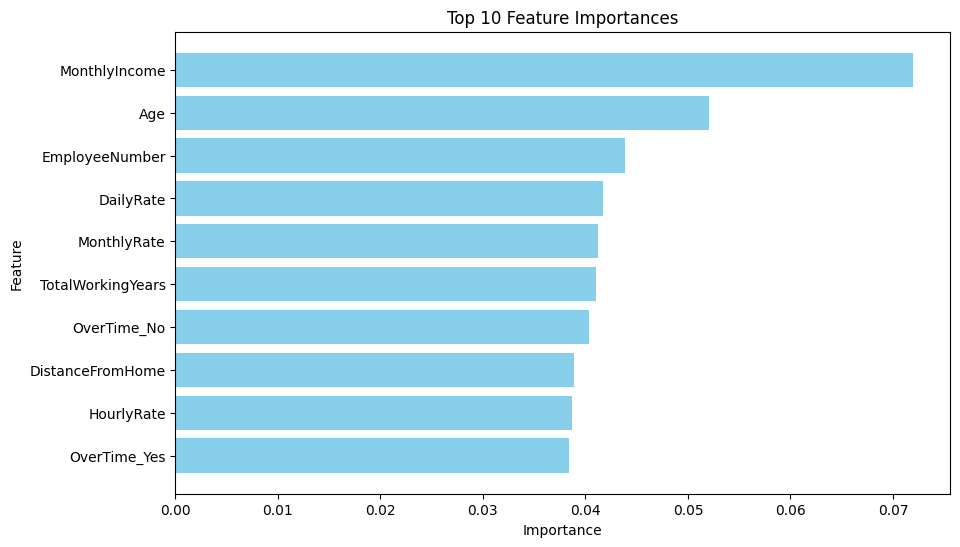

In [31]:
import matplotlib.pyplot as plt

# 중요도를 중요도 기준 내림차순으로 정렬한 데이터프레임에서 상위 10개 특성을 가져옵니다.
top_features = importance_df.head(10)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # 상위 10개의 특성을 위에서 아래로 표시
plt.show()

In [29]:
# import plotly.graph_objs as go
# import chart_studio.plotly as py
# import seaborn as sns


<bound method NDFrame.head of                               Feature  Importance
11                      MonthlyIncome    0.072004
0                                 Age    0.052054
5                      EmployeeNumber    0.043895
1                           DailyRate    0.041747
12                        MonthlyRate    0.041186
19                  TotalWorkingYears    0.041070
53                        OverTime_No    0.040373
2                    DistanceFromHome    0.038879
7                          HourlyRate    0.038649
54                       OverTime_Yes    0.038352
22                     YearsAtCompany    0.037391
25               YearsWithCurrManager    0.030471
13                 NumCompaniesWorked    0.030255
23                 YearsInCurrentRole    0.028937
18                   StockOptionLevel    0.028002
14                  PercentSalaryHike    0.027903
9                            JobLevel    0.026185
24            YearsSinceLastPromotion    0.025006
6             Enviro